<a href="https://colab.research.google.com/github/Sivanesanbalu/llm-law-dataset/blob/main/llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install transformers
!pip install peft
!pip install evaluate

In [ ]:

from datasets import load_dataset

dataset = load_dataset("csv", data_files="/content/Final_IC.csv")
dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article_id', 'article_desc'],
        num_rows: 454
    })
})

In [ ]:
!pip install transformers
from transformers import AutoModelForSequenceClassification # import the object from transformers library

model_checkpoint = "distilbert-base-uncased"

id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 2}


model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=2, id2label=id2label, label2id=label2id
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/Final_IC.csv")
dataset

,article_id,article_desc
0,Article 1 of Indian Constitution,"Name and territory of the Union\n(1) India, th..."
1,Article 2 of Indian Constitution,Admission or establishment of new States: Parl...
2,Article 2A of Indian Constitution,Sikkim to be associated with the Union Rep by ...
3,Article 3 of Indian Constitution,Formation of new States and alteration of area...
4,Article 4 of Indian Constitution,Laws made under Articles 2 and 3 to provide fo...
...,...,...
449,Article 378A of Indian Constitution,Special provision as to duration of Andhra Pra...
450,Article 392 of Indian Constitution,Power of the President to remove difficulties\...
451,Article 393 of Indian Constitution,Short title This Constitution may be called th...
452,Article 394 of Indian Constitution,"Commencement This article and Articles 5, 6, 7..."


In [ ]:
!pip install datasets
!pip install transformers

from datasets import load_dataset
from transformers import AutoTokenizer

dataset = load_dataset("csv", data_files="/content/Final_IC.csv")

model_checkpoint = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

def preprocess_function(examples):
    text = examples["article_id"]

    tokenizer.truncation_side = "left"

    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=512
    )

    return tokenized_inputs

if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
 #   model.resize_token_embeddings(len(tokenizer))



# Use the correct variable name and function name
tokenized_dataset = dataset.map(preprocess_function, batched = True)
tokenized_dataset

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/454 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article_id', 'article_desc', 'input_ids', 'attention_mask'],
        num_rows: 454
    })
})

In [ ]:
!pip install evaluate
import evaluate # import the evaluate module

accuracy = evaluate.load("accuracy")


def compute_metrics(p):
  predictions, labels = p
  predictions = np.argmax(predictions, axis=1)
  return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

In [ ]:
import pandas as pd
import numpy as np
import torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding
import evaluate

# Load the tokenizer and dataset
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)
dataset = pd.read_csv("/content/Final_IC.csv")

# Preprocess function
def preprocess_function(examples):
    text = [str(x) for x in examples["article_id"]] # Convert each element of the list to string
    tokenizer.truncation_side = "left"

    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=512
    )
    return tokenized_inputs

# Ensure pad_token is set
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))  # Ensure model is loaded here

# Convert the DataFrame to a Hugging Face Dataset
hf_dataset = Dataset.from_pandas(dataset)

# Apply the preprocessing function
tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

# Data Collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Load the evaluation metric (accuracy)
accuracy = evaluate.load("accuracy")

# Define compute_metrics function
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

# Example text input for testing untrained model predictions
text_list = [
    'what is article2',
    'Article 21 of the Indian Constitution protects the fundamental right to life and personal liberty...'
]

# Print untrained model predictions
print("Untrained model predictions:")
print(".............................")
for text in text_list:
    inputs = tokenizer.encode(text, return_tensors="pt")
    logits = model(inputs).logits
    predictions = torch.argmax(logits)
    print(text + " - " + id2label[predictions.item()])  # Ensure id2label is defined

# PEFT model configuration using Lora
from peft import LoraConfig, get_peft_model

peft_config = LoraConfig(
    task_type="SEQ_CLS",  # Ensure the task type is correct
    r=60,  # Low-rank adaptation parameter
    lora_alpha=64,
    lora_dropout=0.01,
    target_modules=['q_lin']  # Ensure the module names match the model architecture
)

# Apply PEFT to the model
model = get_peft_model(model, peft_config)

# Print trainable parameters
model.print_trainable_parameters()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/454 [00:00<?, ? examples/s]

Untrained model predictions:
.............................
what is article2 - NEGATIVE
Article 21 of the Indian Constitution protects the fundamental right to life and personal liberty... - NEGATIVE
trainable params: 1,145,090 || all params: 68,100,100 || trainable%: 1.6815


In [ ]:
# Load dataset
file_path = '/content/Final_IC.csv'
df = pd.read_csv(file_path)

# Convert 'article_id' to integers
df['article_id'] = pd.to_numeric(df['article_id'], errors='coerce').fillna(0).astype(int)

# Initialize tokenizer and model
model = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

# Initialize model
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=len(df['article_id'].unique()))

# Ensure pad token is set
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install peft

In [ ]:
# PEFT model configuration using Lora
peft_config = LoraConfig(
    task_type="SEQ_CLS",
    r=60,
    lora_alpha=64,
    lora_dropout=0.01,
    target_modules=['q_lin'] # Change target_modules to 'q_proj'
)

# Apply PEFT to the model
model= get_peft_model(model, peft_config)

In [ ]:
# Preprocess function
def preprocess_function(examples):
    text = examples["article_desc"]
    tokenized_inputs = tokenizer(
        text,
        truncation=True,
        padding="max_length",
        max_length=512
    )
    # Convert labels to floats
    tokenized_inputs["labels"] = [float(x) for x in examples["article_id"]] # Convert each element of the list to a float
    return tokenized_inputs

# Convert DataFrame to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(df)
tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/454 [00:00<?, ? examples/s]

In [ ]:
## Load accuracy metric
import numpy as np # Use numpy
accuracy = evaluate.load("accuracy")

# Compute metrics function
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

In [ ]:
# Import the necessary modules from the transformers library
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding

training_args = TrainingArguments(
    output_dir="./results",  # Where the model checkpoints will be saved
    learning_rate=5e-5,  # The learning rate for the optimizer
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    num_train_epochs=10,  # Number of epochs to train the model
    weight_decay=0.01,  # Weight decay for regularization
    evaluation_strategy="epoch",  # Perform evaluation after every epoch
    save_strategy="epoch",  # Save model checkpoint after each epoch
    load_best_model_at_end=True,  # Load the best checkpoint at the end
    logging_dir='./logs',  # Directory to save training logs
    logging_steps=10  # Log metrics every 10 steps
)
trainer = Trainer(
    model=model,  # Pre-trained model to fine-tune
    args=training_args,  # Training arguments
    train_dataset=tokenized_dataset,  # Training dataset (tokenized)
    eval_dataset=tokenized_dataset,  # Evaluation dataset (tokenized)
    tokenizer=tokenizer,  # Tokenizer to preprocess inputs
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),  # Handles dynamic padding for input batches
    compute_metrics=compute_metrics  # Function to calculate evaluation metrics
)
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.002400,0.000303,{'accuracy': 1.0}
2,0.002400,0.000247,{'accuracy': 1.0}
3,0.001700,0.000329,{'accuracy': 1.0}
4,0.001500,0.000106,{'accuracy': 1.0}
5,0.001000,0.000147,{'accuracy': 1.0}
6,0.000900,0.000198,{'accuracy': 1.0}
7,0.001000,0.000178,{'accuracy': 1.0}
8,0.001000,0.000085,{'accuracy': 1.0}
9,0.001000,0.000077,{'accuracy': 1.0}
10,0.000800,0.000074,{'accuracy': 1.0}


Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation 

TrainOutput(global_step=290, training_loss=0.0015032584843193662, metrics={'train_runtime': 248.019, 'train_samples_per_second': 18.305, 'train_steps_per_second': 1.169, 'total_flos': 617350972416000.0, 'train_loss': 0.0015032584843193662, 'epoch': 10.0})

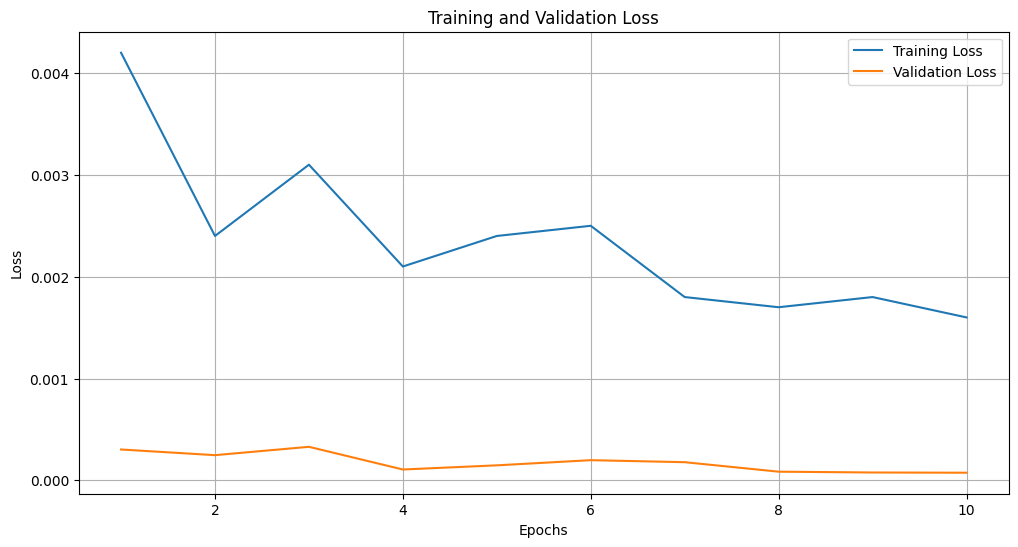

Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Evaluation results:
{'eval_loss': 7.449902477674186e-05, 'eval_accuracy': {'accuracy': 1.0}, 'eval_runtime': 8.1754, 'eval_samples_per_second': 55.532, 'eval_steps_per_second': 3.547, 'epoch': 10.0}


In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
import matplotlib.pyplot as plt
history = trainer.state.log_history
train_losses = [entry['loss'] for entry in history if 'loss' in entry]
eval_losses = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]

# Use the minimum length to ensure the plot is valid
epochs = range(1, min(len(train_losses), len(eval_losses)) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses[:len(epochs)], label='Training Loss')
plt.plot(epochs, eval_losses[:len(epochs)], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')


plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


# Assuming eval_results is obtained from the trainer
eval_results = trainer.evaluate()

# Print evaluation results
print("Evaluation results:")
print(eval_results)

In [ ]:
trainer = Trainer(
    model=model,  # Pre-trained model to fine-tune
    args=training_args,  # Training arguments
    train_dataset=tokenized_dataset,  # Training dataset (tokenized)
    eval_dataset=tokenized_dataset,  # Evaluation dataset (tokenized)
    tokenizer=tokenizer,  # Tokenizer to preprocess inputs
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),  # Handles dynamic padding for input batches
    compute_metrics=compute_metrics  # Function to calculate evaluation metrics
)
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000800,0.000263,{'accuracy': 1.0}
2,0.000500,0.000070,{'accuracy': 1.0}
3,0.000400,0.000055,{'accuracy': 1.0}
4,0.000400,0.000058,{'accuracy': 1.0}
5,0.000300,0.000042,{'accuracy': 1.0}


Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation 

TrainOutput(global_step=285, training_loss=0.00048508415276413423, metrics={'train_runtime': 125.3745, 'train_samples_per_second': 18.106, 'train_steps_per_second': 2.273, 'total_flos': 308675486208000.0, 'train_loss': 0.00048508415276413423, 'epoch': 5.0})

In [ ]:
# Evaluate the fine-tuned model
fine_tuned_results = trainer.evaluate()

print("Fine-Tuned Model Results:")
print(fine_tuned_results)


Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Fine-Tuned Model Results:
{'eval_loss': 7.449902477674186e-05, 'eval_accuracy': {'accuracy': 1.0}, 'eval_runtime': 9.03, 'eval_samples_per_second': 50.277, 'eval_steps_per_second': 3.212, 'epoch': 10.0}


In [ ]:
# Load the baseline model (e.g., BERT without fine-tuning)
baseline_model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(df['article_id'].unique()))

# Initialize Trainer for baseline model
baseline_trainer = Trainer(
    model=baseline_model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,  # Same metrics for comparison
)

# Evaluate the baseline model
baseline_results = baseline_trainer.evaluate()

print("Baseline Model Results:")
print(baseline_results)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainer is attempting to log a value of "{'accuracy': 1.0}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Baseline Model Results:
{'eval_loss': 0.35830816626548767, 'eval_model_preparation_time': 0.0129, 'eval_accuracy': {'accuracy': 1.0}, 'eval_runtime': 15.509, 'eval_samples_per_second': 29.273, 'eval_steps_per_second': 1.87}


In [ ]:
# Compare key metrics
print("Comparison of Models:")
print(f"Fine-tuned Model Accuracy: {fine_tuned_results['eval_accuracy']}")
print(f"Baseline Model Accuracy: {baseline_results['eval_accuracy']}")




Comparison of Models:
Fine-tuned Model Accuracy: {'accuracy': 1.0}
Baseline Model Accuracy: {'accuracy': 1.0}
